# Load all necessary moduls

In [1]:
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.optimize import*
import seaborn as sns
%matplotlib inline

# Linear regression for single variable

### Load dataset and transfer them into dataframe

In [2]:
df = pd.read_csv("age_bloodpressure.txt", names=['Age', 'Blood Pressure'],usecols=(2,3),delim_whitespace=True)

### Plot the data points

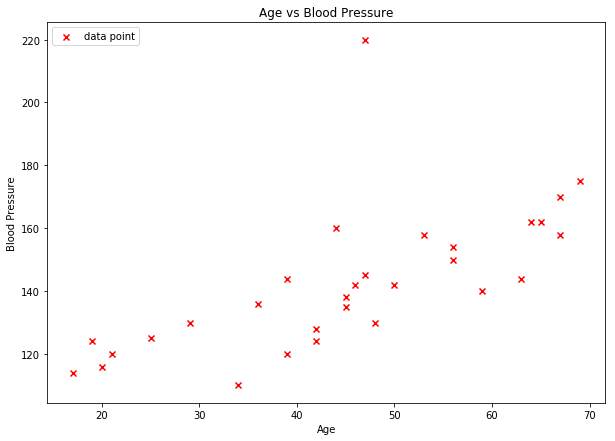

In [3]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df['Age'],df['Blood Pressure'],label="data point",color="r",marker="x")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")
ax.set_title("Age vs Blood Pressure")
ax.legend(loc=2)

### Add the constant at the front of the dataframe

In [4]:
df.insert(0,"Ones",1)

### Split the dataframe to X and Y

In [5]:
cols=df.shape[-1]
#X=df.iloc[:,0:cols-1]
X=df.loc[:,["Ones","Age"]]
Y=df.loc[:,["Blood Pressure"]]
#Y=df.iloc[:,cols-1:cols]

### Split the dataset to train set and test set

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

### Transfer the series to matrixes

In [7]:
X=np.matrix(X.values)
Y=np.matrix(Y.values)

### Initialize the theta to [0,0]

In [8]:
theta=np.matrix(np.array([0,0]))

### Define the compute cost function

In [9]:
def computeCost(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    inner=np.power(((X * theta.T)-Y),2)
    return np.sum(inner)/(2*len(X))

In [10]:
computeCost(theta,X,Y)

10404.333333333334

### Define the gradient descent function

In [11]:
def gradientDescent(X,Y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    count=0
    m=len(X)
    
    while count < iters:
        error=(X*theta.T)-Y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/m)*np.sum(term))
            
        theta=temp
        cost[count]=computeCost(theta,X,Y)
        count+=1
    
    return theta,cost

# Find the optimization solution by gradient descent

In [12]:
alpha=0.0007
iters=100000

In [13]:
g,cost=gradientDescent(X,Y,theta,alpha,iters)
print("The intercept is",g[0,0])
print("The coefficient is",g[0,1])
print("The new cost is",computeCost(g,X,Y))

The intercept is 98.6239735272
The coefficient is 0.972680137664
The new cost is 139.891144393


### Calculate the theta by using convex optimization

In [14]:
result=minimize(computeCost, x0=theta, args=(X,Y),method="BFGS",options={'maxiter':400})
result.x
print("The intercept is",result.x[0])
print("The coefficient is",result.x[1])

The intercept is 98.7147221741
The coefficient is 0.970870263424


### Calculate the theta by sklearn, least square

In [39]:
lm=linear_model.LinearRegression()
lm.fit(X,Y)
print("The coefficients are",lm.coef_[0,1])
print("The intercept is",lm.intercept_[0])

The coefficients are 0.970870351443
The intercept is 98.7147181382


### Check the residual plot to make sure the relation is linear

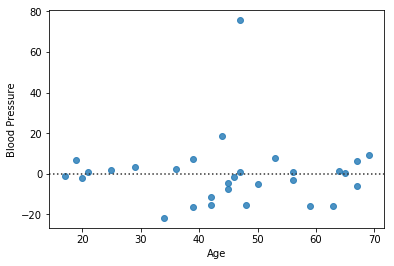

In [16]:
sns.residplot(df["Age"],df["Blood Pressure"])

### Draw the datapoints and the regression line

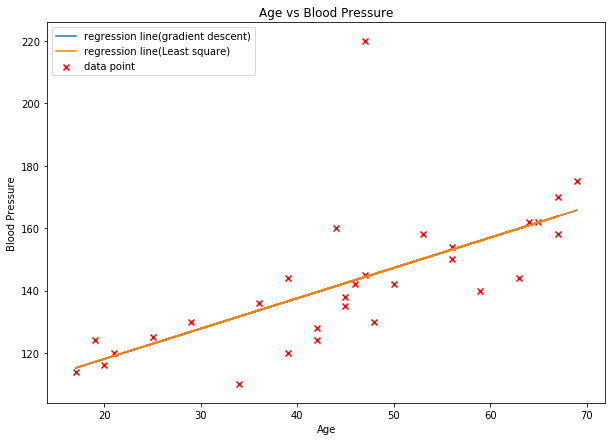

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(df['Age'],df["Age"]*g[0,1]+g[0,0],label="regression line(gradient descent)")
ax.plot(df['Age'],df["Age"]*lm.coef_[0][1]+lm.intercept_[0],label="regression line(Least square)")
ax.scatter(df['Age'],df['Blood Pressure'],label="data point",color="r",marker="x")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")
ax.set_title("Age vs Blood Pressure")
ax.legend(loc=2)

### Plot the decrease of the cost

(1000, 100000)

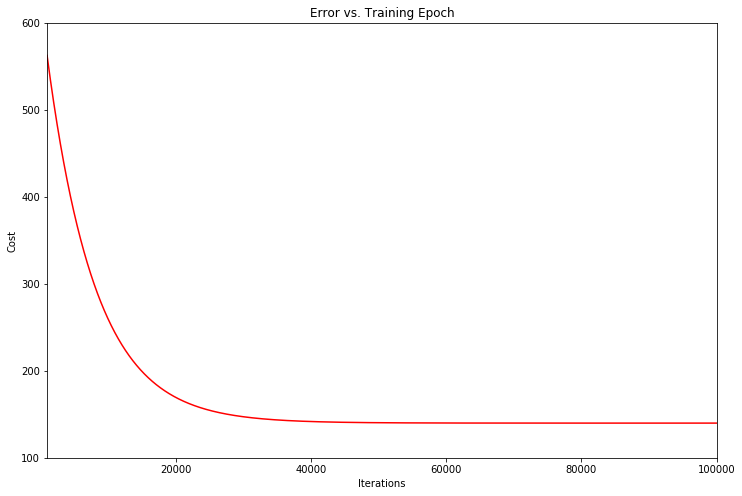

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.set_ylim(100,600)
ax.set_xlim(1000,100000)

### Evulate the model by calculate the RMSE and R-square values

In [19]:
Y_pred = lm.predict(X_test)
# 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R^2:",metrics.r2_score(Y_test, Y_pred))

RMSE: 7.64289884294
R^2: 0.697116602585


### Add the prediction to the original dataframe

In [20]:
df["Blood Pressure(predicted)"]=lm.predict(df.iloc[:,0:2])

# Linear regression for multiple variables

In [21]:
df1= pd.read_csv("age_temp_length.txt", names=['Age of fish', 'Temp of water','Fish length'],usecols=(1,2,3),delim_whitespace=True,header=36)

### Normalize the data

In [22]:
df1=(df1-df1.mean())/df1.std()
df1.head()

,Age of fish,Temp of water,Fish length
0,-1.553847,-1.326307,-1.871709
1,-1.239402,-1.326307,-1.348745
2,-0.947418,-1.326307,-0.743009
3,-0.632973,-1.326307,-0.381825
4,-0.318528,-1.326307,0.001932


### Insert constant 1 to the font of the dataframe

In [23]:
df1.insert(0,"Ones",1)

### Split data to X and Y

In [24]:
cols=df1.shape[1]
X2=df1.loc[:,["Ones","Age of fish","Temp of water"]]
Y2=df1.loc[:,["Fish length"]]
#X2=df1.iloc[:,0:cols-1]
#Y2=df1.iloc[:,cols-1:cols]

### Split the dataset to train set and test set

In [25]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=1)

### Transfer the series to matrixes

In [26]:
X2=np.matrix(X2_train.values)
Y2=np.matrix(Y2_train.values)

### Initilize the theta

In [27]:
theta2=np.matrix(np.array([0,0,0]))
computeCost(theta2,X2,Y2)

0.43498083401512483

### Do calculation

In [46]:
alpha=0.03
iters=1000
g2,cost2=gradientDescent(X2,Y2,theta2,alpha,iters)
print("The intercept is",g2[0,0])
print("The coefficient is",g2[0,1:])
print("The new cost is",computeCost(g2,X2,Y2))

The intercept is 0.0788467287975
The coefficient is [[ 0.90856289 -0.10173531]]
The new cost is 0.0906643744628


### Plot the cost function

Text(0.5,1,'Error vs. Training Epoch')

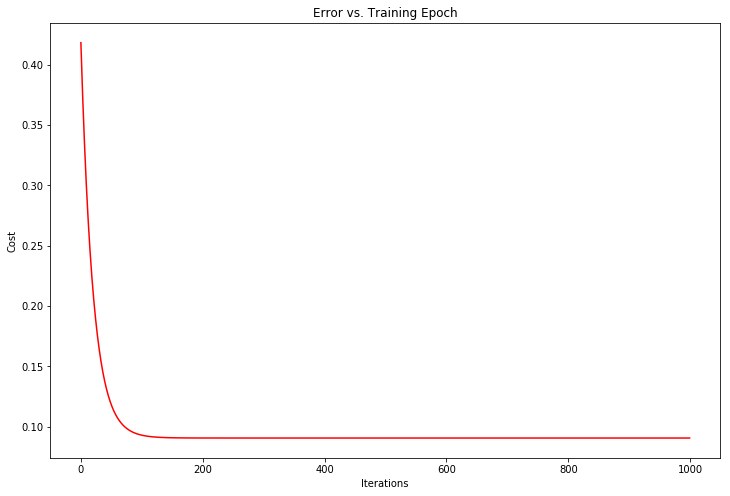

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Find the optimization solution by convex optimization

In [30]:
result2=minimize(computeCost, x0=theta2, args=(X2,Y2),method="BFGS",options={'maxiter':400})
print("The intercept is",result2.x[0])
print("The coefficients are",result2.x[1:])

The intercept is 0.0788421518626
The coefficients are [ 0.90856819 -0.10173521]


### Find the optimization solution by sklearn

In [31]:
lm2=linear_model.LinearRegression()
lm2.fit(X2_train,Y2_train)
print(lm2.coef_[0])
print(lm2.intercept_)

[ 0.          0.90856289 -0.10173531]
[ 0.07884673]


In [32]:
Y2_pred = lm2.predict(X2_test)
# 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y2_test, Y2_pred)))
print("R^2:",metrics.r2_score(Y2_test, Y2_pred))

RMSE: 0.518307980756
R^2: 0.771780234149


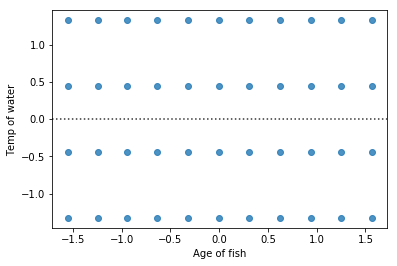

In [33]:
sns.residplot(df1['Age of fish'],df1["Temp of water"])

In [34]:
df1["Length of fish(predicted)"]=lm2.predict(df1.iloc[:,0:3])

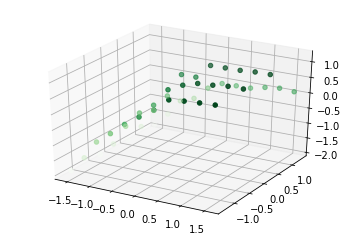

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df1["Age of fish"], df1["Temp of water"], df1["Fish length"], c=df1["Fish length"], cmap='Greens')

In [36]:
df1["Difference"]=abs(df1["Fish length"]-df1["Length of fish(predicted)"])
df1.head()

,Ones,Age of fish,Temp of water,Fish length,Length of fish(predicted),Difference
0,1,-1.553847,-1.326307,-1.871709,-1.197988,0.673721
1,1,-1.239402,-1.326307,-1.348745,-0.912296,0.436449
2,1,-0.947418,-1.326307,-0.743009,-0.647010,0.096000
3,1,-0.632973,-1.326307,-0.381825,-0.361317,0.020509
4,1,-0.318528,-1.326307,0.001932,-0.075624,0.077557


### Normal Equation

In [37]:
XT=X2.T
print(np.matmul(np.matmul(pinv(np.matmul(XT,X2)),XT),Y2))

[[ 0.07884673]
 [ 0.90856289]
 [-0.10173531]]


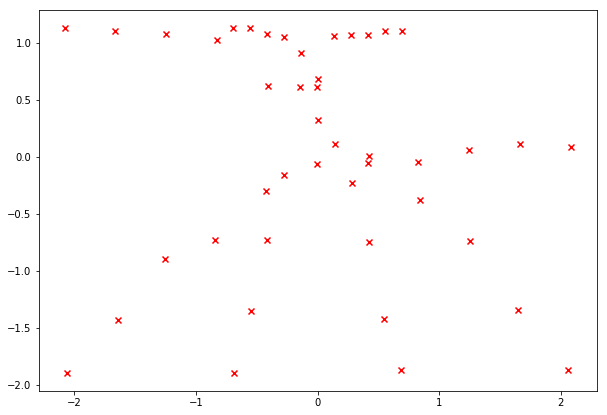

In [38]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df1['Age of fish']*df1["Temp of water"],df1["Fish length"],label="data point",color="r",marker="x")